# Part 2
- Perform the 5 data visualization tasks (given below) on the student performance dataset given in the link below. Each figure: 800×600 px, 300 DPI, title, labeled axes/units, legend if applicable, readable ticks. For each, add a 5–8 sentence interpretation to reports. Before the visualizations (analysis step) you need to perform ingestion stage and preprocessing step (missing values etc.)   (10 points).


Ingestion

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing

In [90]:
#Inspection:

# print("\nChecking for missing values:")
# print(df.isnull().sum()) #No nulls
# df.info #many Object types -> Best to convert to categories
# df.head()
data = pd.read_csv('../data_raw/StudentsPerformance.csv')
df = pd.DataFrame(data)
print("DataFrame created successfully:")
print(df.head())

DataFrame created successfully:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


Converting object columns to category columns

In [91]:
df['gender'] = df['gender'].astype('category')
df['race/ethnicity'] = df['race/ethnicity'].astype('category')
df['parental level of education'] = df['parental level of education'].astype('category')
df['lunch'] = df['lunch'].astype('category')
df['test preparation course'] = df['test preparation course'].astype('category')
df.dtypes

gender                         category
race/ethnicity                 category
parental level of education    category
lunch                          category
test preparation course        category
math score                        int64
reading score                     int64
writing score                     int64
dtype: object

# Visualization

Setup / Side By Side Chart Visualiztion

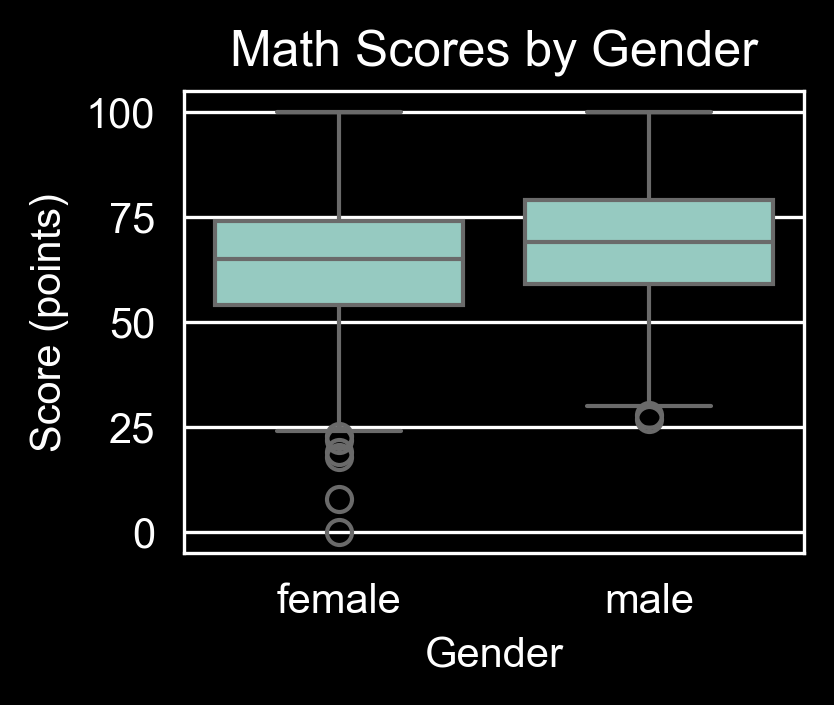

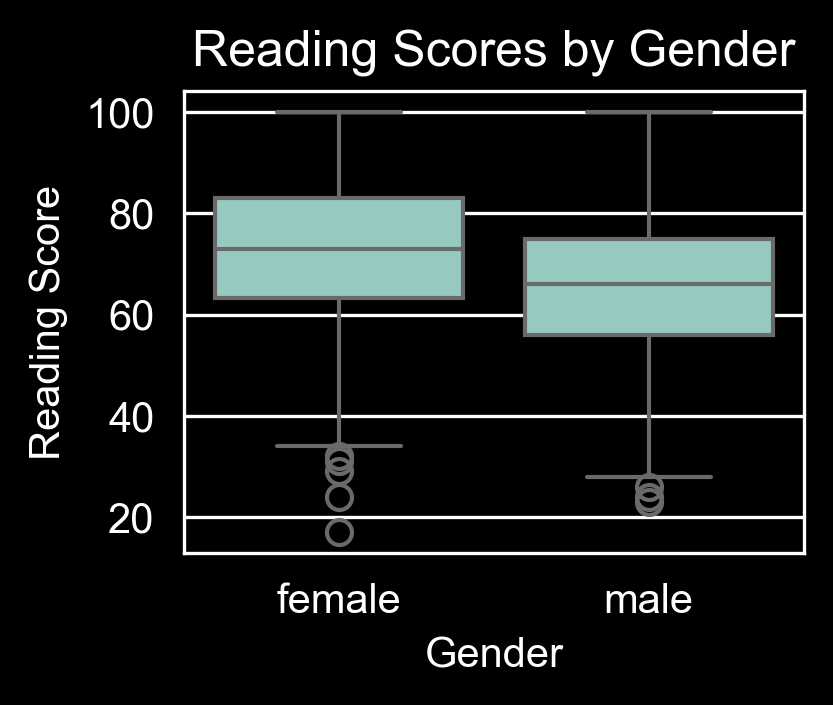

In [92]:
# Define the desired pixel dimensions
width_px = 800
height_px = 600
dpi = 300

# Calculate figure size in inches: size (inches) = size (pixels) / dpi
width_in = width_px / dpi
height_in = height_px / dpi

def setup_plot(title, xlabel, ylabel):
    plt.figure(figsize=(width_in, height_in), dpi=dpi)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=0)


#Math scores
setup_plot("Math Scores by Gender", "Gender", "Score (points)")
sns.boxplot(x='gender', y='math score', data=df)
# #Reading Scores
setup_plot("Reading Scores by Gender", "Gender", "Reading Score")
sns.boxplot(x='gender', y='reading score', data=df)


plt.show()

# V1.a
- Question: Are there gender differences in math vs reading?

In [93]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# V2 — Test prep impact on math
Question: Do students who completed test prep score higher in math?

Chart: Any chart of your choice for math score by test preparation course (completed vs none).

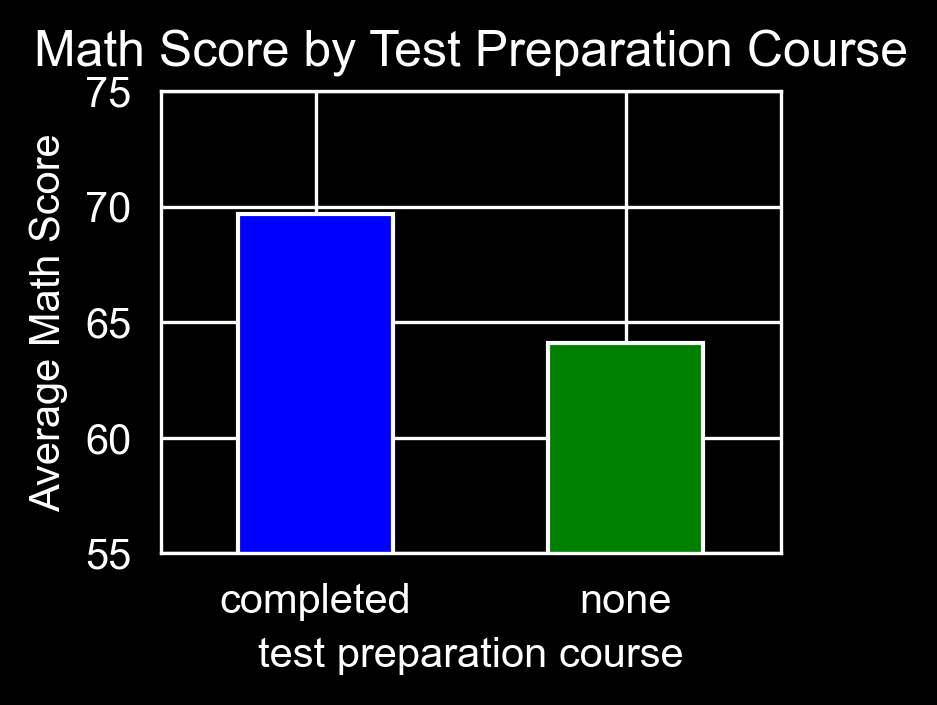

In [94]:
#get averages by test prep status
#Calculate average scores
average_scores = df.groupby('test preparation course', observed=False)['math score'].mean()

# Setup and plot
setup_plot('Math Score by Test Preparation Course', 'Test Preparation Course', 'Average Math Score')
average_scores.plot(kind='bar', color=['blue', 'green'])
plt.xticks(rotation=0) #Keep labels horizontal
plt.ylim(55,75) #Bars are relitively close. zooming to make difference more pronounced
plt.show()
# print(average_scores)

# V3 — Lunch type and average performance
Question: Does lunch type (standard vs free/reduced) relate to outcomes?

Chart: Grouped bar chart of mean overall_avg of all the scores (math, reading, writing) by lunch.


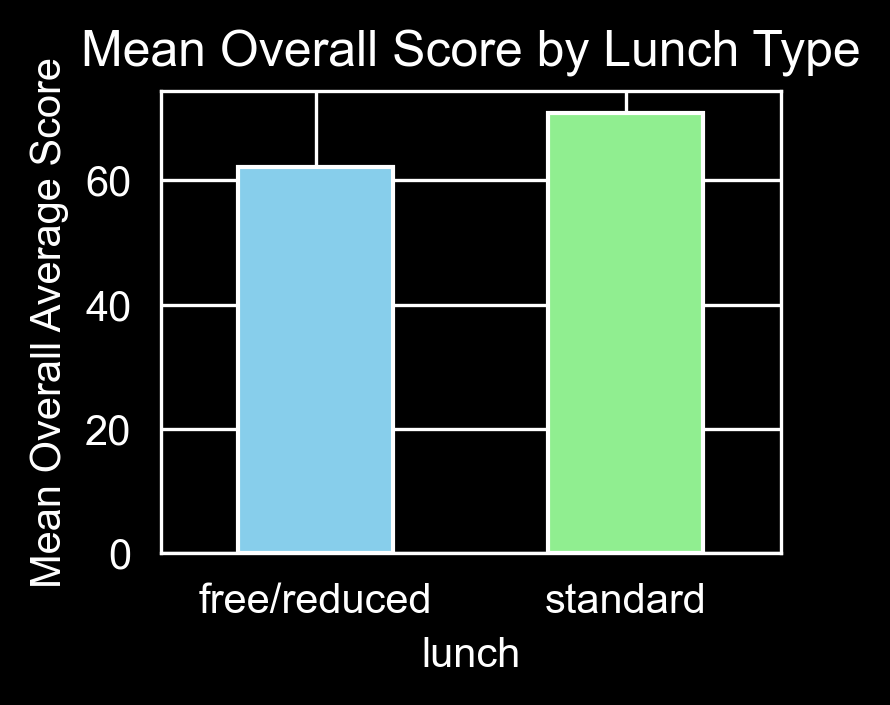

In [95]:
#writing the average of the 3 subjects to a new column `overall average`
df['overall_avg'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

#Next, grouping by the lunch column and taking the average of both groups
lunch_group_means = df.groupby('lunch', observed=False)['overall_avg'].mean()
# lunch_group_means
# Generate grouped bar chart
setup_plot('Mean Overall Score by Lunch Type', 'Lunch Type', 'Mean Overall Average Score')
lunch_group_means.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.xticks(rotation=0)
# plt.tight_layout()
plt.show()

# V4 — Subject correlations (2 pts)

Question: How strongly do the three subjects move together?

Chart: Correlation heatmap for math, reading, writing with annotated coefficients.

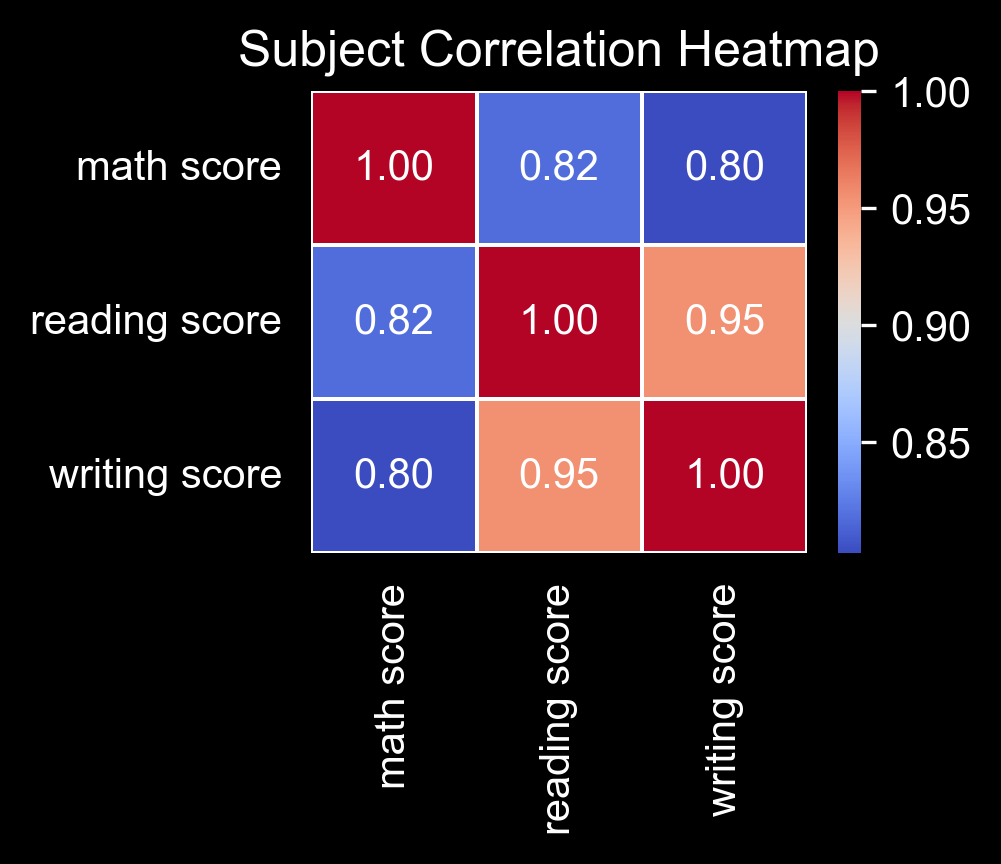

In [96]:
#Grab important columns:
subject_scores = df[['math score', 'reading score', 'writing score']]
#Calculate the correlations
corr_matrix = subject_scores.corr()
# print("Correlation Matrix:")
# print(corr_matrix)
# #
setup_plot('Subject Correlation Heatmap', '', '')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.show()

# V5 — Math vs reading with trend lines by test prep (2 pts)

Question: How strongly are math and reading scores associated, and do students who completed the test‑preparation course have a different slope in the math–reading relationship than those who did not?


Color: Points colored by test preparation course (legend must show the two groups and each group’s n).


In [97]:
# capture math score correlation with reading score
correlation = df['math score'].corr(df['reading score'])
print(f"Overall correlation between math and reading scores: {correlation}")

Overall correlation between math and reading scores: 0.8175796636720541


Chart: Scatter plot with two straight best‑fit lines (one for each group: completed, none).
X‑axis: reading score
Y‑axis: math score

I am using `seaborn` with the `lmplot` function bc it automatically plots the data and fits a regression line for the 2 groups

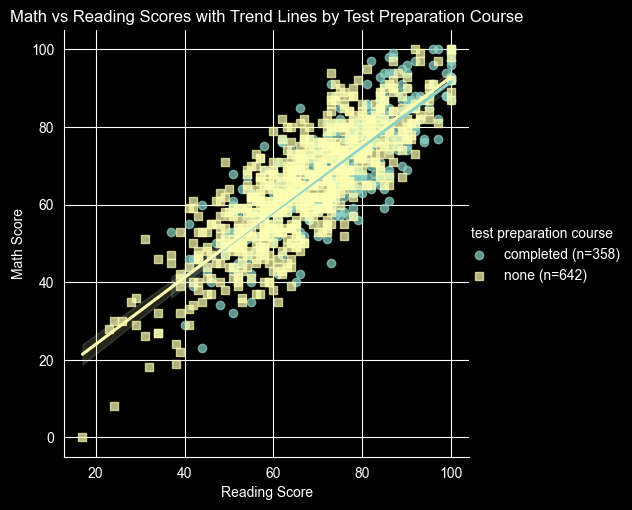

<Figure size 800x600 with 0 Axes>

In [98]:
#Setting up the plot using seaborn's lmplot
g = sns.lmplot(x='reading score', y='math score', hue='test preparation course', data=df, markers=['o', 's'], scatter_kws={'alpha': 0.7})

#Calculate N for each group to add to the legend
counts = df.groupby('test preparation course', observed=False).size()
new_labels = [f'{l} (n={counts[l]})' for l in counts.index]

#Update legend labels
for t, label in zip(g.legend.texts, new_labels):
    t.set_text(label)

#Set plot title and axis labels
plt.title('Math vs Reading Scores with Trend Lines by Test Preparation Course')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.figure(figsize=(width_in, height_in), dpi=dpi)

#Display the plot
plt.show()